# Material ID : mp-3056 (NaTlO₂)

In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from pymatgen.core.lattice import Lattice
from jupyter_jsmol import JsmolView
from ipywidgets import Layout, widgets, interact
from IPython.display import display
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import json
# An optional utility to display a progress bar
# for long-running loops. `pip install tqdm`.
from tqdm import tqdm

In [2]:
api_key = "IDG8oerg7OP5AeRfbNjUZBb1Ad4Qke2l"
material_id = "mp-3056"

mpr = MPRester(api_key)

structure = mpr.get_structure_by_material_id(material_id)
el_bs = mpr.get_bandstructure_by_material_id(material_id)
el_dos = mpr.get_dos_by_material_id(material_id)
ph_bs = mpr.get_phonon_bandstructure_by_material_id(material_id)
ph_dos = mpr.get_phonon_dos_by_material_id(material_id)

conv_struc = SpacegroupAnalyzer(structure).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Télécharger le fichier .cif

In [3]:
from pymatgen.io.cif import CifWriter

CifWriter(structure).write_file(material_id+".cif")

# Étude du diffractogramme

Nous devons déterminer les 3 premiers pics du diffractogramme correspondant à notre crystal (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

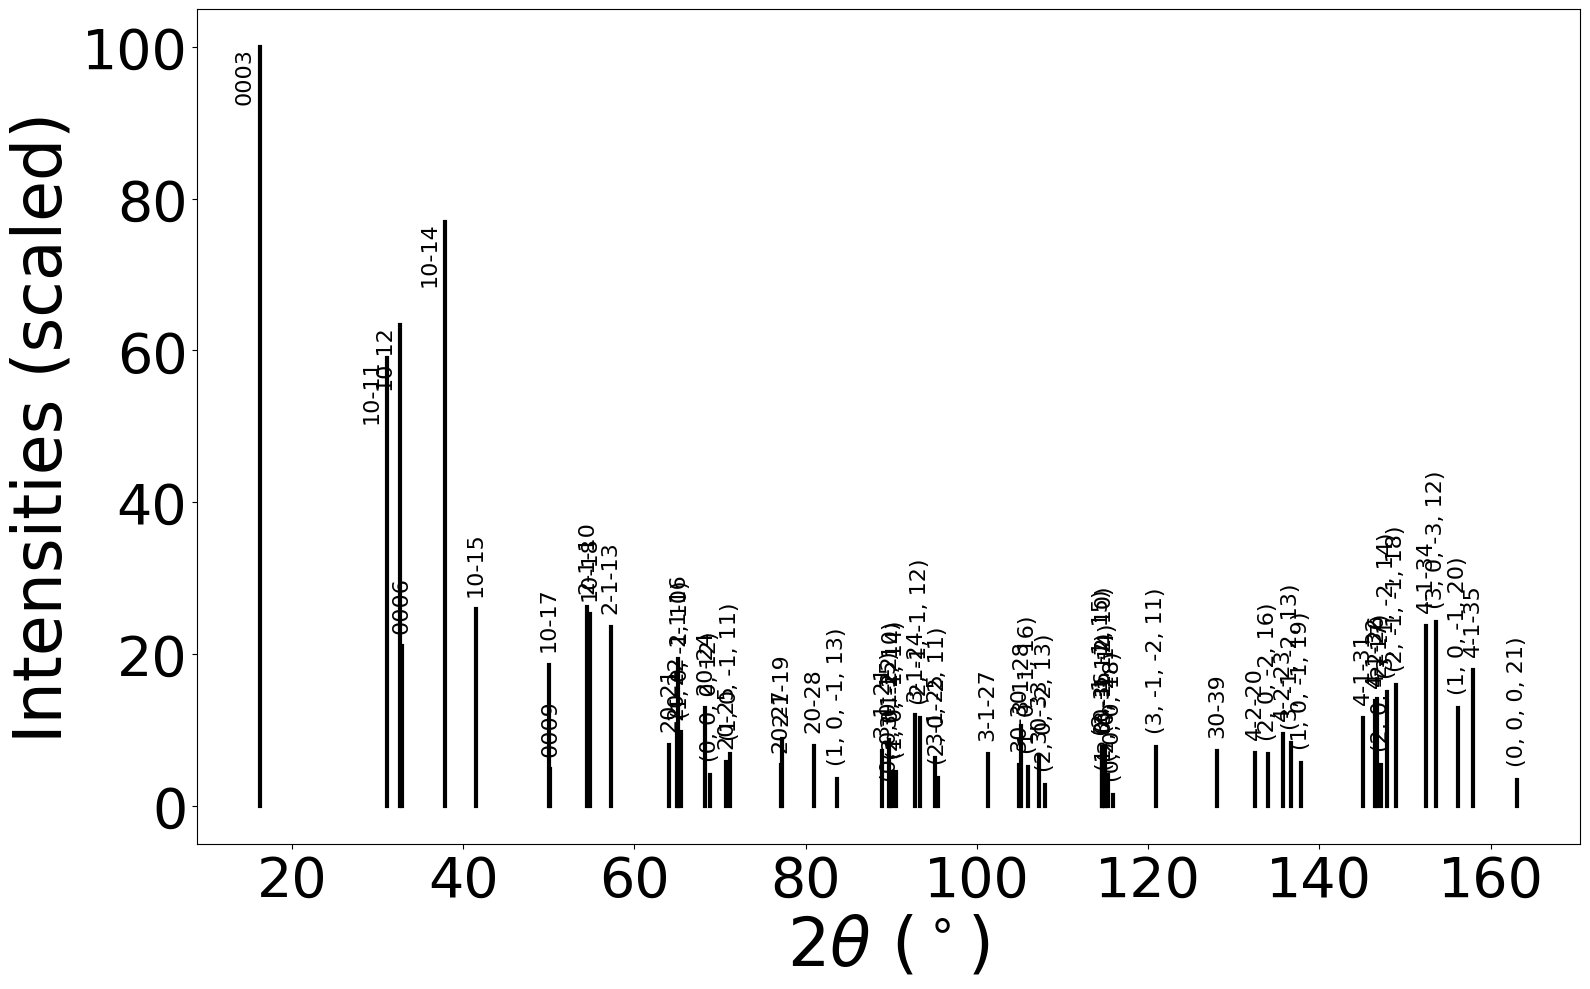

In [4]:
xrd = XRDCalculator('CuKa',1.54060)       #wavelength='CuKa')
pattern = xrd.get_pattern(conv_struc, two_theta_range=(0,180))

#Diffractogramme pour un intervalle [0, pi] pour 2Theta
xrd.get_plot(conv_struc, annotate_peaks="compact", two_theta_range=(0,180))

Les indices hkl, ou indices de Miller, sont des indices utilisés comme notation pour décrire les plans cristallins et les directions dans un réseau cristallin (slide 104).

Les pics de Bragg apparaissent sous forme de raies nettes sur un diagramme de diffraction des rayons X, qui est un tracé de l'intensité du rayonnement diffusé en fonction de l'angle de diffraction. Chaque pic de Bragg correspond à un ensemble de plans atomiques dans le cristal qui satisfont la condition de la loi de Bragg pour une longueur d'onde donnée.

La condition de Bragg est (slide 165) :
\begin{equation*}
    n \lambda = 2d \sin (\theta)
\end{equation*}

Il existe des conditions aux présences des pics de Bragg en fonction du type de réseau du cristal. Ici, nous avons à faire à une structure caractérisée par un réseau cristallin rhomboédrique avec le groupe d'espace R-3m (166) donc un réseau de type R qui impose, pour la présence des pics, que les conditions de présence des réflexions dans un diagramme de diffraction suivent la relation :
\begin{equation*}
−h+k+l=3n
\end{equation*}

où $n$ est un entier. Cette condition découle de la symétrie du réseau rhomboédrique et de sa description en coordonnées hexagonales.

Toutes les valeurs reprises dans le diffractogramme respectent bien ces valeurs.

Notons que dans un réseau rhomboédrique, on peut décrire un pic soit avec des indices de Miller classiques ($hkl$) en utilisant la base rhomboédrique, soit avec des indices de Miller-Bravais ($hkil$) en utilisant la base hexagonale. La notation hexagonale est souvent préférée car elle met mieux en évidence la symétrie du réseau.

Le $i$ est simplement $i=−(h+k)$.

# Analyse des trois premiers pics

In [5]:
pic = ["Premier pic", "Deuxième pic", "Troisième pic"]

for i in range(3):
    print('------', pic[i], '------')
    print('Angle 2Theta [°] = ', round(pattern.x[i], 4))
    print("Intensité [%] =    ", round(pattern.y[i],4))
    print("Indices hkl [-] :", pattern.hkls[i])
    print("Distance entre les plans [Å] :", round(pattern.d_hkls[i],4), '\n')

------ Premier pic ------
Angle 2Theta [°] =  16.2471
Intensité [%] =     100.0
Indices hkl [-] : [{'hkl': (0, 0, 0, 3), 'multiplicity': 2}]
Distance entre les plans [Å] : 5.4556 

------ Deuxième pic ------
Angle 2Theta [°] =  31.1414
Intensité [%] =     59.0006
Indices hkl [-] : [{'hkl': (1, 0, -1, 1), 'multiplicity': 12}]
Distance entre les plans [Å] : 2.872 

------ Troisième pic ------
Angle 2Theta [°] =  32.5862
Intensité [%] =     63.4012
Indices hkl [-] : [{'hkl': (1, 0, -1, 2), 'multiplicity': 12}]
Distance entre les plans [Å] : 2.7479 



<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

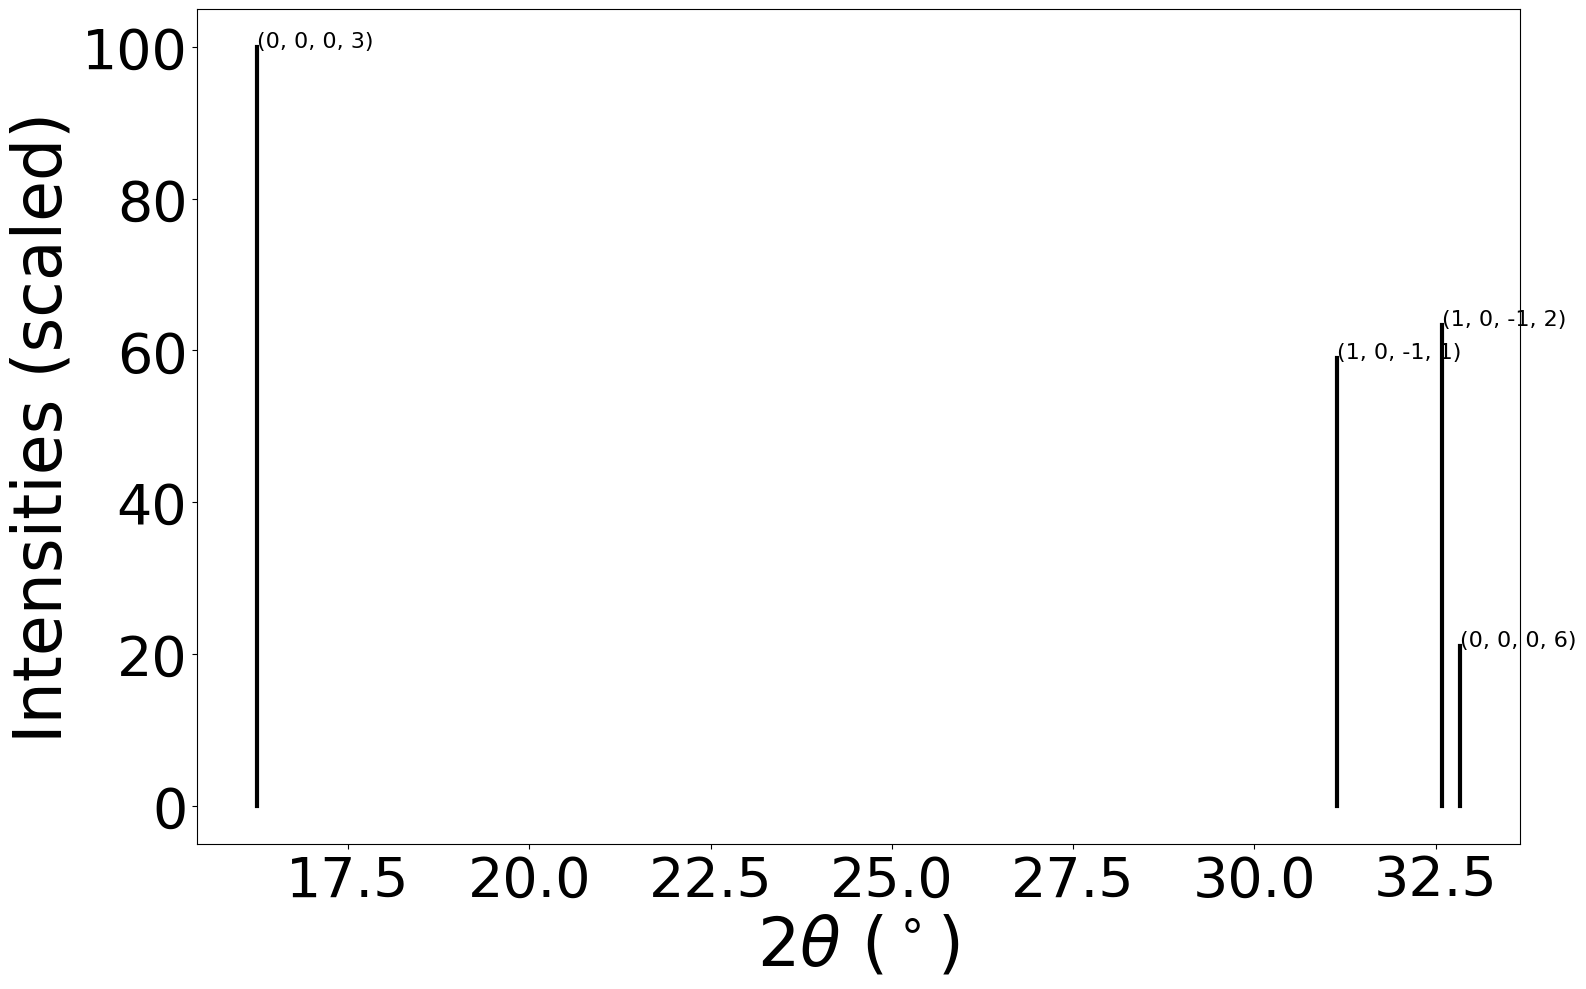

In [6]:
#Diffractogramme pour les 3 premiers pics
xrd.get_plot(conv_struc, two_theta_range=(0,35), annotate_peaks = 'full')

L'angle 2θ est l'angle entre le rayon incident de rayons X et le rayon diffracté mesuré à partir de la normale au plan cristallin. Cela correspond à l'angle de déviation du rayonnement diffracté par rapport au rayonnement incident.

La multiplicité fait référence au nombre de pics de diffraction qui correspondent à un même ensemble de plans cristallins. Cela peut être vu comme le nombre de fois où un même ensemble de plans cristallins est réfléchi par les rayons X incident sur le cristal. Plus un cristal est symmétrique, plus les multiplicités des pics sont élevées.

Pour connaître la distance entre des plans parallèles voisins, nous calculons l'espacement interplanaire, où $a$ est le paramètre du réseau :
\begin{equation*}
d_{hkl}=\frac{a}{\sqrt{h^2+k^2+l^2}}
\end{equation*}

### Conclusion

On peut remarquer que l'angle $\theta$ et $(h^2 + k^2 + l^2)^{1/2}$ augmentent au fur et à mesure des pics. Il est également à observer que la distance interplanaire est plus grande que la distance atomique (± 1 Ångström) pour les trois premiers pics.

Le premier pic $(0,0,0,3)$ est le plus intense $(100 \%)$ et apparaît à un angle $2\theta$ relativement faible $(16.2471^\circ)$. Cela est cohérent avec la théorie qui indique que, pour de faibles angles, le facteur de forme atomique $f(\theta)$ est proche du numéro atomique moyen des éléments présents dans la maille.  

Le deuxième pic $(1,0,-1,1)$, apparaissant à $2\theta = 31.1414^\circ$, possède une intensité réduite $(\sim 59\%)$. Cette diminution peut être expliquée par le facteur de structure de la maille, qui diminue l’intensité de certaines réflexions. Toutefois, la multiplicité de ce plan (12) contribue à maintenir une intensité non négligeable.  

Le troisième pic $(1,0,-1,2)$, situé à $2\theta = 32.5862^\circ$, est légèrement plus intense $(\sim 63.5\%)$ que le deuxième, malgré un angle légèrement supérieur. Cette intensité plus élevée peut être attribuée à une meilleure contribution des interférences constructives liées aux plans équivalents. Toutefois, comme l’angle $\theta$ est plus grand, le facteur de forme atomique diminue, expliquant pourquoi ce pic reste moins intense que le premier.  